# Project 4, Part 1

Kris Barbier

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
#Supplemental imports
import holidays
import datetime as dt
from holidays import country_holidays
#Import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
#Settings
plt.rcParams['figure.figsize'] = (12,4)
pd.set_option('display.max_columns',50)

## Load in Combined Data 

In [2]:
#Check what files exist in the folder
FOLDER = 'Data/Chicago/'
file_list = sorted(os.listdir(FOLDER))
file_list

['Chicago-Crime_2001.csv',
 'Chicago-Crime_2002.csv',
 'Chicago-Crime_2003.csv',
 'Chicago-Crime_2004.csv',
 'Chicago-Crime_2005.csv',
 'Chicago-Crime_2006.csv',
 'Chicago-Crime_2007.csv',
 'Chicago-Crime_2008.csv',
 'Chicago-Crime_2009.csv',
 'Chicago-Crime_2010.csv',
 'Chicago-Crime_2011.csv',
 'Chicago-Crime_2012.csv',
 'Chicago-Crime_2013.csv',
 'Chicago-Crime_2014.csv',
 'Chicago-Crime_2015.csv',
 'Chicago-Crime_2016.csv',
 'Chicago-Crime_2017.csv',
 'Chicago-Crime_2018.csv',
 'Chicago-Crime_2019.csv',
 'Chicago-Crime_2020.csv',
 'Chicago-Crime_2021.csv',
 'Chicago-Crime_2022.csv',
 'Chicago-Crime_2023.csv',
 'README.txt']

In [3]:
#Use glob to find crime csv files
q = FOLDER+"Chicago-*csv"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/Chicago/Chicago-*csv


['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [4]:
#Use list comprehension to load all files into 1 data frame
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1358218,01/01/2001 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
1,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
3,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
4,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
...,...,...,...,...,...,...,...,...,...,...,...,...
184358,13214935,09/18/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,False,1934,19.0,44.0,41.934326,-87.640408
184359,13214587,09/18/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1533,15.0,28.0,41.880486,-87.746119
184360,13216919,09/18/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1924,19.0,44.0,41.944512,-87.650520
184361,13215232,09/18/2023 12:00:00 AM,THEFT,$500 AND UNDER,CTA BUS,False,False,531,5.0,9.0,41.688692,-87.610781


In [5]:
#Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897703 entries, 0 to 184362
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 677.9+ MB


In [6]:
#Check missing values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11803
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 89821
Longitude                89821
dtype: int64

In [7]:
#Drop null values from district column
df = df.dropna(subset = 'District')
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11803
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614849
Latitude                 89821
Longitude                89821
dtype: int64

In [8]:
# #Get US holidays
# all_days = pd.date_range(df["Date"].min(), df["Date"].max())
# us_holidays = country_holidays('US')

In [9]:
# #Add holidays to df
# df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
# df.head()

## Preparation for Analysis

### Convert to Datetime Data Type

In [8]:
#Check datetime format
test = df['Date'][0]
test

0    01/01/2001 01:00:00 PM
0    01/01/2002 01:00:00 PM
0    01/01/2003 01:00:00 PM
0    01/01/2004 01:00:00 AM
0    01/01/2005 01:00:00 AM
0    01/01/2006 01:00:00 PM
0    01/01/2007 01:00:00 PM
0    01/01/2008 01:00:00 PM
0    01/01/2009 01:00:00 PM
0    01/01/2010 01:00:00 PM
0    01/01/2011 01:00:00 AM
0    01/01/2012 01:00:00 AM
0    01/01/2013 01:00:00 AM
0    01/01/2014 01:00:00 AM
0    01/01/2015 01:00:00 AM
0    01/01/2016 01:00:00 AM
0    01/01/2017 01:00:00 AM
0    01/01/2018 01:00:00 AM
0    01/01/2019 01:00:00 AM
0    01/01/2020 01:00:00 AM
0    01/01/2021 01:00:00 PM
0    01/01/2022 01:00:00 AM
0    01/01/2023 01:00:00 PM
Name: Date, dtype: object

- Need to use format: %m/%d/%Y %I:%M:%S %p

In [9]:
#Set format
fmt = "%m/%d/%Y %I:%M:%S %p"

In [10]:
#Convert date to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format = fmt)
#Verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897656 entries, 0 to 184362
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 710.1+ MB


/var/folders/5v/9gj8mfq115g1d799797d3z5m0000gp/T/ipykernel_96319/737403833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format = fmt)


### Set Datetime as Index

In [11]:
#Set date column as index
df_ts = df.set_index('Date')
df_ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1358218,ASSAULT,SIMPLE,APARTMENT,False,False,312,3.0,NaN,41.778744,-87.612135
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1310610,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909


In [12]:
#Confirm index
df_ts.index

DatetimeIndex(['2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-09-18 00:00:00', '2023-09-18 00:00:00',
               '2023-09-18 00:00:00', '2023-09-18 00:00:00',
               '2023-09-18 00:00:00', '2023-09-18 00:00:00',
               '2023-09-18 00:00:00', '2023-09-18 00:00:00',
               '2023-09-18 00:00:00', '2023-09-18 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=7897656, freq=None)

### Feature Engineering

In [13]:
#Drop columns not pertaining to questions
df_ts = df_ts.drop(columns = ['ID', 'Location Description', 'Ward', 
                              'Latitude', 'Longitude'])
df_ts.head()

,Primary Type,Description,Arrest,Domestic,Beat,District
Date,,,,,,
2001-01-01 13:00:00,ASSAULT,SIMPLE,False,False,312,3.0
2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,True,False,1434,14.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,False,725,7.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1223,12.0


In [14]:
#Feature engineering year and month columns
df_ts['Year'] = df_ts.index.year
df_ts['Month'] = df_ts.index.month
df_ts['Month Name'] = df_ts.index.month_name()
df_ts.head()


,Primary Type,Description,Arrest,Domestic,Beat,District,Year,Month,Month Name
Date,,,,,,,,,
2001-01-01 13:00:00,ASSAULT,SIMPLE,False,False,312,3.0,2001,1,January
2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,True,False,1434,14.0,2001,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0,2001,1,January
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,False,725,7.0,2001,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1223,12.0,2001,1,January


## Question 1: Comparing Police Districts

- Which district has the most crimes? 
- Which has the least?

In [18]:
# #Group data by district and resample to daily frequency
# df_districts = df_ts.groupby('District').resample('D').size()
# df_districts

District  Date      
1.0       2001-01-01    38
          2001-01-02    44
          2001-01-03    44
          2001-01-04    41
          2001-01-05    67
                        ..
9.0       2023-09-14    28
          2023-09-15    37
          2023-09-16    35
          2023-09-17    36
          2023-09-18     1
Length: 190731, dtype: int64

In [ ]:
#

In [15]:
# #Convert district to string type
# df_ts['District'] = df_ts['District'].values.astype(str)
# df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7897656 entries, 2001-01-01 13:00:00 to 2023-09-18 00:00:00
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Description   object
 2   Arrest        bool  
 3   Domestic      bool  
 4   Beat          int64 
 5   District      object
 6   Year          int64 
 7   Month         int64 
 8   Month Name    object
dtypes: bool(2), int64(3), object(4)
memory usage: 497.1+ MB


In [ ]:
#Group crimes by district
crime_dist = df_ts.groupby('District').agg({'Primary Type': ['sum']})
crime_dist

In [16]:
# #Group crime type with district
# crime_dist = df_ts.groupby('Primary Type')['District'].value_counts().sort_index()
# crime_dist

Primary Type       District
ARSON              1.0           126
                   10.0          849
                   11.0          868
                   12.0          574
                   14.0          592
                               ...  
WEAPONS VIOLATION  5.0          8072
                   6.0          8873
                   7.0         10944
                   8.0          7049
                   9.0          7022
Name: District, Length: 755, dtype: int64

In [17]:
# #Convert to df
# plot_df = crime_dist.to_frame('# of Crimes').reset_index()
# plot_df

,Primary Type,District,# of Crimes
0,ARSON,1.0,126
1,ARSON,10.0,849
2,ARSON,11.0,868
3,ARSON,12.0,574
4,ARSON,14.0,592
...,...,...,...
750,WEAPONS VIOLATION,5.0,8072
751,WEAPONS VIOLATION,6.0,8873
752,WEAPONS VIOLATION,7.0,10944
753,WEAPONS VIOLATION,8.0,7049


In [ ]:
# #Plot data
# g = sns.catplot(data=plot_df, x='District', y='# of Crimes',
#                 kind='point',aspect=2, height=4,
#                 hue='Primary Type', col='Primary Type',col_wrap=2,
#                sharey=False, sharex=False)
# [ax.grid(axis='x') for ax in g.axes];

### Resample Data

In [ ]:
# #Resample data to daily with sum
# df_daily = df_ts.resample('D').size()
# df_daily

### Impute (if necessary)

## Question 2: Comparing Crimes Across the Years

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

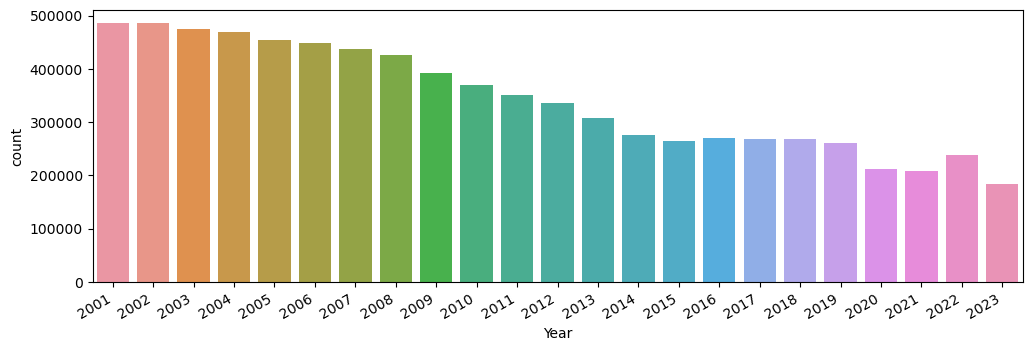

In [21]:
#Plot years
ax = sns.countplot(data=df_ts, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate();


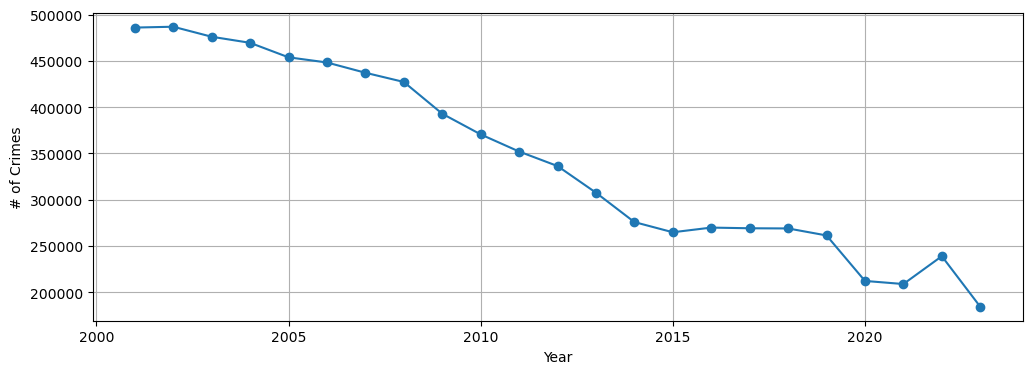

In [22]:
## save year counts
year_counts = df_ts['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');


- Overall, there seems to be a general decreasing trend in crimes over the years. Next, we will look at specific crimes that may or may not be following this trend.

In [24]:
# # Group by primary type and resample data to yearly
# yearly_crimes= df_ts.groupby('Primary Type')['Year'].resample('A').sum()
# yearly_crimes

Primary Type       Date      
ARSON              2001-12-31     2023011
                   2002-12-31     2066064
                   2003-12-31     1912865
                   2004-12-31     1559112
                   2005-12-31     1385455
                                   ...   
WEAPONS VIOLATION  2019-12-31    12798441
                   2020-12-31    17032640
                   2021-12-31    18148580
                   2022-12-31    17743050
                   2023-12-31    12963384
Name: Year, Length: 754, dtype: int64

In [25]:
#Group crime type with year
crime_year = df_ts.groupby('Primary Type')['Year'].value_counts().sort_index()
crime_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8775
                   2023    6408
Name: Year, Length: 720, dtype: int64

In [26]:
#Convert to df
plot_df = crime_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8775


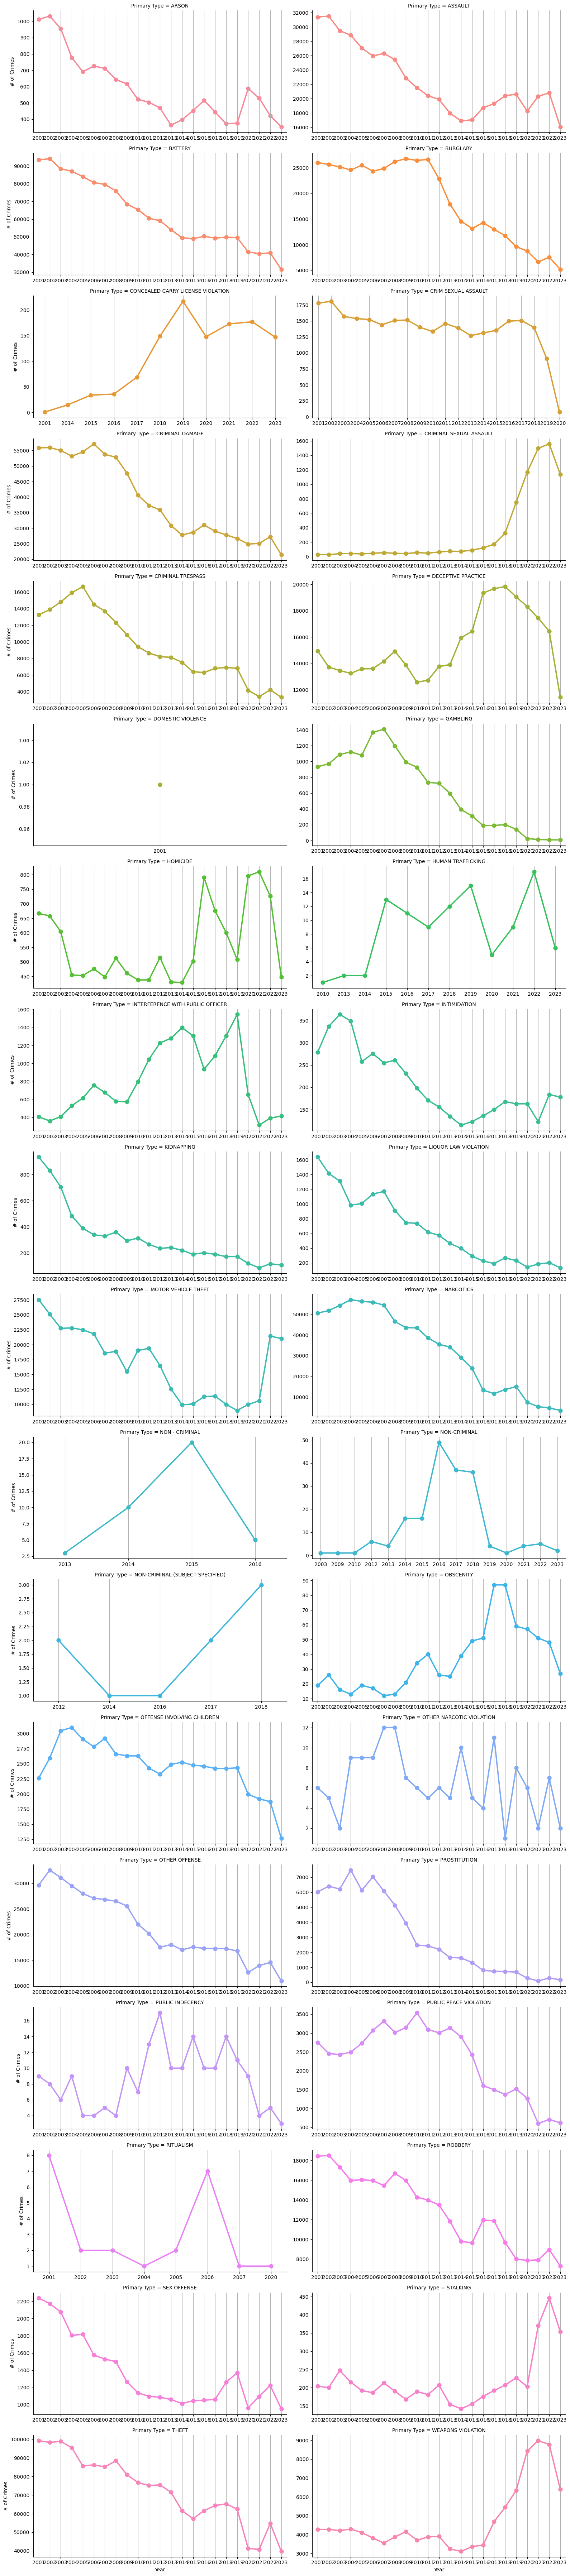

In [27]:
#Plot data
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- For the many different types of crimes we listed, many of them seem to show a similar downward trend to the yearly distribution of crimes. The following types do not follow this general trend: concealed carry license violation, criminal sexual assault, deceptive practice, homicide, human trafficking, interference with a public officer, motor vehicle theft (in recent years), non-criminal offenses, obscenity, public indecency, stalking, and weapons violations.

## Question 4: Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

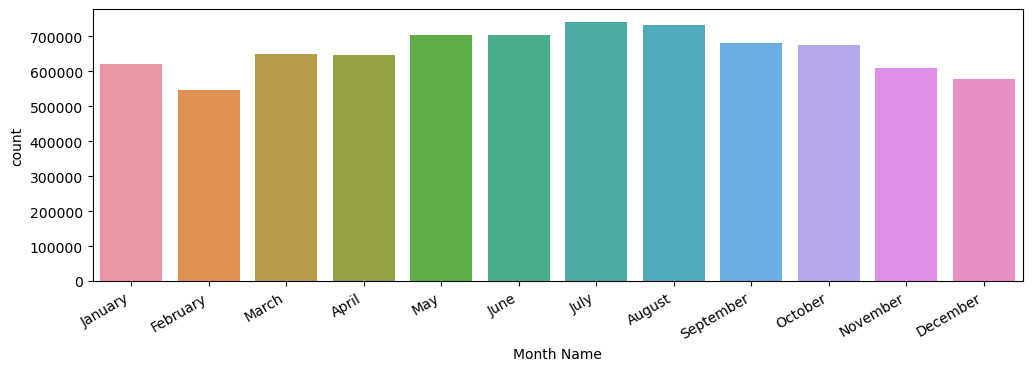

In [31]:
#Plot months
ax = sns.countplot(data=df_ts, x='Month Name')
fig = ax.get_figure()
fig.autofmt_xdate();

- In general, the months with the most crime are May, June, July, and August. There seem to be less crimes in the winter months than the summer months. Next, we will examine which crimes, if any, do not follow this general pattern.

In [32]:
#Group crime type with month name
crime_month = df_ts.groupby('Primary Type')['Month'].value_counts().sort_index()
crime_month

Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1134
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10689
                   9         9848
                   10        9188
                   11        7953
                   12        7403
Name: Month, Length: 415, dtype: int64

In [33]:
#Convert to df
plot_df = crime_month.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10689
411,WEAPONS VIOLATION,9,9848
412,WEAPONS VIOLATION,10,9188
413,WEAPONS VIOLATION,11,7953


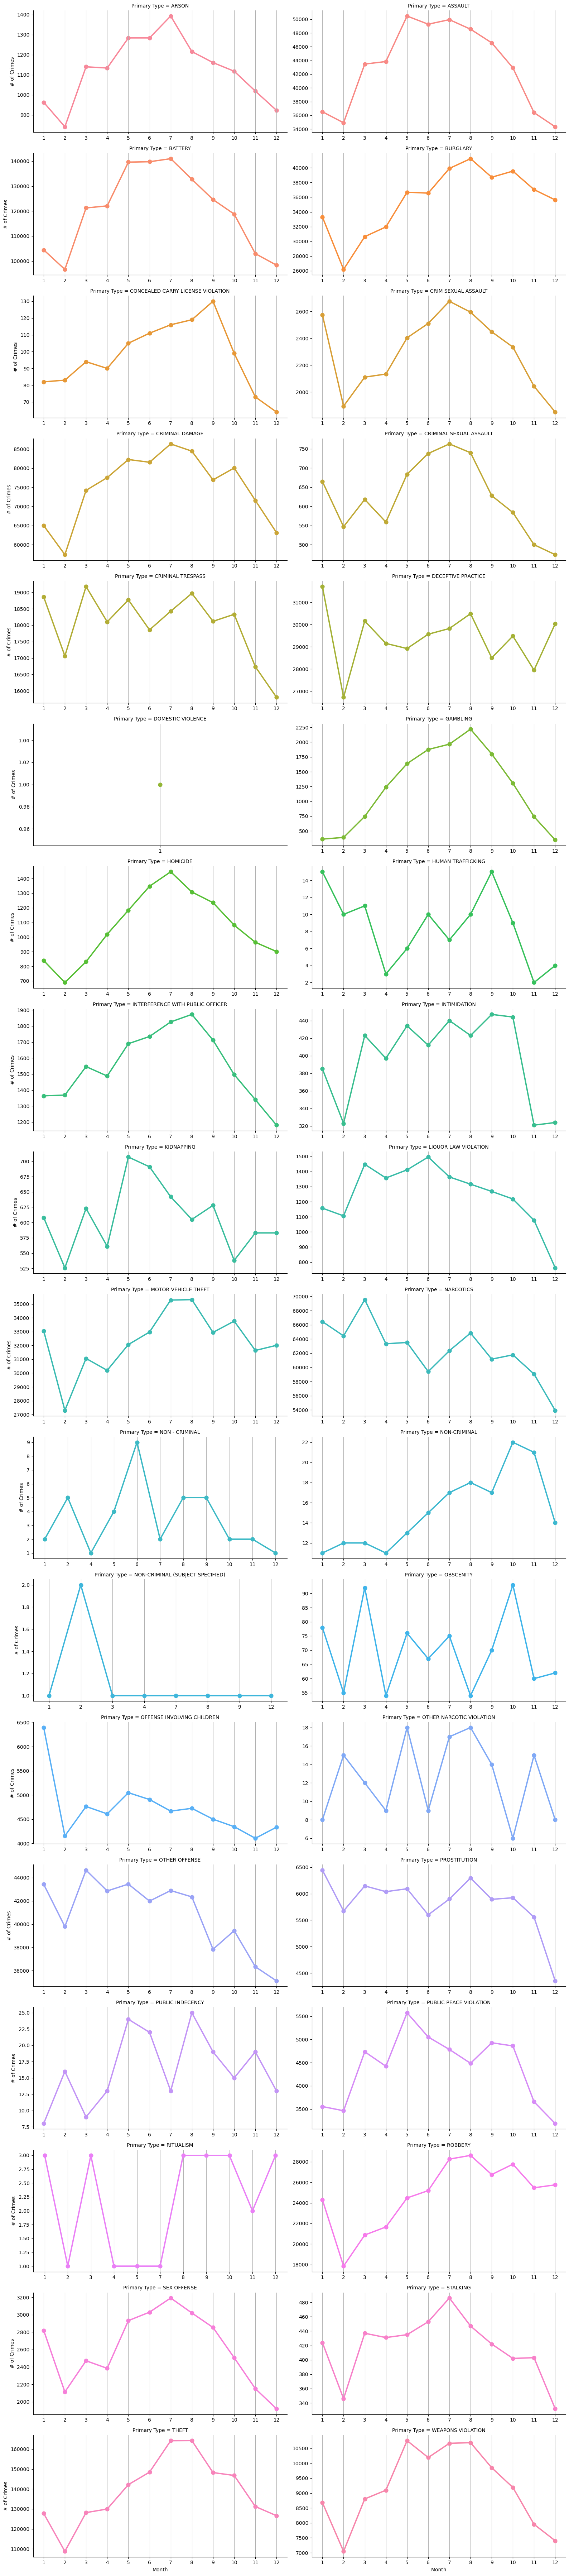

In [35]:
#Plot data
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- From these plots, we can see the following crimes happen outside of the typical higher crime months listed above: concealed carry license violation, criminal sexual assault (large amounts in January), criminal trespass, deceptive practice, human trafficking, intimidation, liquor law violation, motor vehicle theft, narcotics, some non-criminal offenses, obscenity, offense involving children, other narcotic violation, other offenses, prostitution, and ritualism. 